<a href="https://colab.research.google.com/github/EhabYasser2002/Statistics-Labs/blob/main/Statistics_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Lab1

## Imports

In [ ]:
import matplotlib.pyplot as plt #Python 2D plotting library
from scipy.stats import norm #Python package for distributions
import numpy as np #Python package for powerful N-dimensional array operations

plt.style.use('classic') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

## Distribution Operations

In [ ]:
def generate_data(x_min = -5.0, x_max = 5.0, num = 1000):
    """
    generates evenly spaced numbers over a specified interval

    Parameters:
    x_min (float): the starting point of the sequence
    x_max (float): the end point of the sequence
    num (int): the number of points to be generated

    Returns:
    x (array-like): equally spaced numbers

    """

    x = np.linspace(x_min, x_max, num)   #Hint: try np.linspace() method
    return x

In [ ]:
def compute_mean_std(x):
    """
    Computes the approximate mean and standard deviation of an array of normally distributed numbers

    Parameters:
    x (array-like): the array of numbers

    Returns:
    mean (float): the mean of the array
    std (float): the standard deviation of the array
    """

    mean = np.mean(x)   #Hint: use np for this purpose
    std = np.std(x)    #Hint: use np for this purpose
    return mean, std

In [ ]:
def get_normal_pdf(x, mean=0, std=1.0):
    """
    generates the normal pdf for the range x

    Parameters:
    x (array-like): the range of x axis
    mean (float): the mean of the normal distribution
    std (float): the standard deviation of the normal distribution

    Returns:
    y (array-like): the normal pdf of numbers in x

    """

    y = norm.pdf(x, mean, std)     #Try to write your own pdf expression. Otherwise, you can use the built-in one
    return y

In [ ]:
def standardize(y):
    """
    Standardize the given normally distributed array

    Parameters:
    y (array-like): Array of normally distributed values

    Returns:
    z (array-like): the standard version of the input array

    """
    mean, std = compute_mean_std(y)
    z = (y - mean)/std   #Transform y to z
    return z

## Normal Distribution Plot

It's required to implement a function that plots normal distribution for a given array of numbers distributed over a given range.

Please, follow the following signature:

In [ ]:
def plot_normal(x, y = None):#, xlim_min = -1.0, xlim_max = 1.0, ylim_min = 0, ylim_max = 1.0):
    """
    Plots the pdf of the normal (Gaussian) distribution

    Parameters:
    x (array-like): the data points to be plotted
    xlim_min (float): the lower bound of x axis
    xlim_max (float): the upper bound of x axis
    ylim_min (float): the lower bound of y axis
    ylim_max (float): the upper bound of y axis
    """
    if y is None:
        y = get_normal_pdf(x)

    x_min = np.min(x)
    x_max = np.max(x)
    x_range = x_max - x_min
    x_min -= x_range / 10
    x_max += x_range / 10
    ylim_min = np.min(y)
    ylim_max = np.max(y)
    y_range = ylim_max - ylim_min
    ylim_min -= y_range / 10
    ylim_max += y_range / 10
    
    #Use plt library to show your plot. You are encouraged to play with plt functions to
    #get a colorful and neat plot
    #For example: plt.xlabel('X')
    plt.xlim(x_min, x_max)
    plt.ylim(ylim_min, ylim_max)
    plt.axes().set_facecolor("k")
    plt.title("Normal Distribution", fontweight = 'bold')
    plt.xlabel('X', fontweight = 'bold')
    plt.ylabel('PDF', fontweight = 'bold')
    plt.plot(x, y, color = 'r', linewidth = 3)
    plt.show()


## Driver Code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


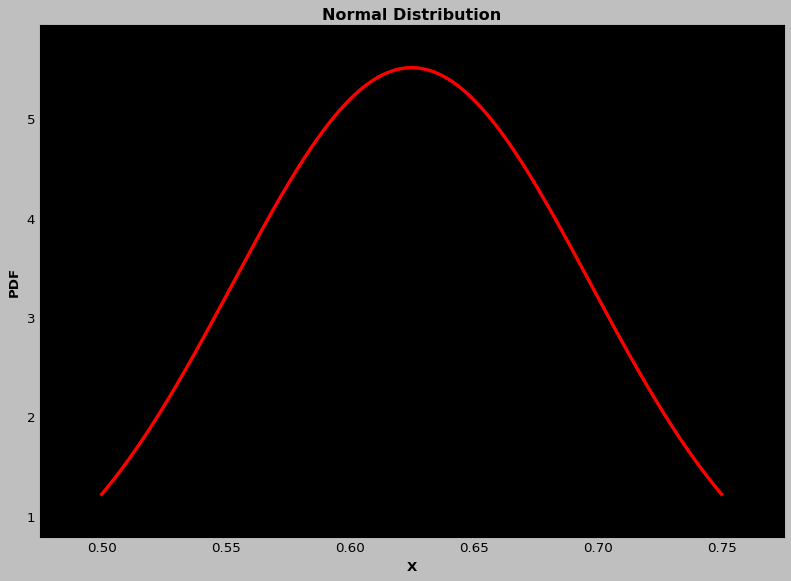

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


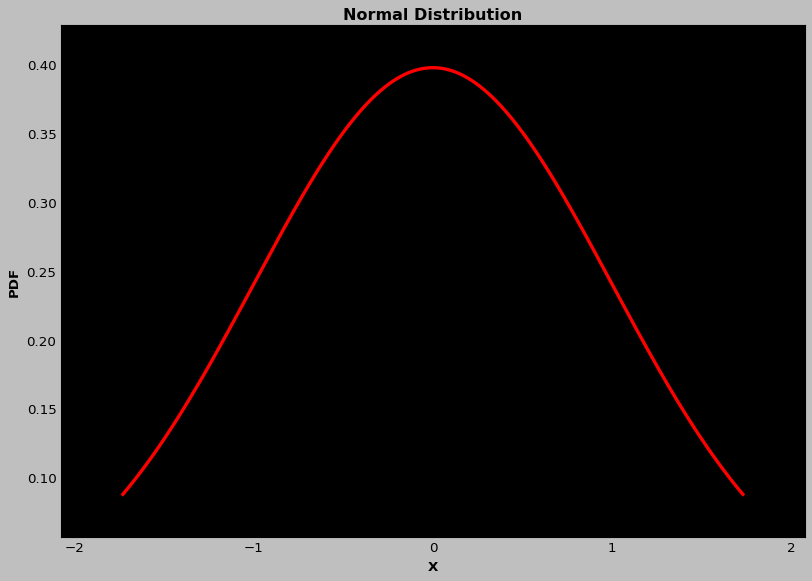

In [ ]:
x_min = 0.5
x_max = 0.75

ylim_min = 0.0
ylim_max = 1.0

x = generate_data(x_min, x_max, 100000)

mean, std = compute_mean_std(x)

y = get_normal_pdf(x, mean, std)

plot_normal(x, y)#, x_min, x_max, ylim_min, ylim_max)

z = standardize(x)

x_min = z[0]
x_max = z[len(z) - 1]

new_mean, new_std = compute_mean_std(z)

new_y = get_normal_pdf(z, new_mean, new_std)

plot_normal(z, new_y)#, x_min, x_max, ylim_min, ylim_max)

## Bonus Part

### CDF 

In [66]:
def compute_inverse_cdf(p, mean = 0, std = 1):
    """
    Computes the inverse of CDF, where P{X <= x} = p

    Parameters:
    p (float): the value of the CDF, where 0 <= p <= 1
    mean a.k.a µ (float): the mean of the normal distribution
    std a.k.a σ (float): the standard deviation of the normal distribution mean

    Returns:
    x (float): the point that satisfies the equation P{X <= x} = p
    """
    
    x = norm.ppf(p, mean, std) #No hints
    return x

### CDF Plot

In [99]:
def plot_cdf(X, cdf=0.5):
    """
    Plots the cdf of the normal (Gaussian) distribution at a given certain point

    Parameters:
    x (array-like): the data points to be plotted
    cdf: the plot shaded percentage that representins the normal distribution cdf
    """
    
    #No hints

    x_min = np.min(X)
    x_max = np.max(X)
    x_range = x_max - x_min
    x_max += x_range / 10
    ylim_min = np.min(cdf)
    ylim_max = np.max(cdf)
    y_range = ylim_max - ylim_min
    ylim_max += y_range / 10

    plt.xlim(X[0], x_max)
    plt.ylim(cdf[0], ylim_max)
    plt.axes().set_facecolor("k")
    plt.title("Cumulative Distribution", fontweight = 'bold')
    plt.xlabel('X', fontweight = 'bold')
    plt.ylabel('CDF', fontweight = 'bold')
    plt.plot([X[0], x], [percent, percent], color = 'b', linewidth = 2)
    plt.plot([x, x], [0, percent], color = 'b', linewidth = 2)
    plt.plot(X, cdf, color = 'r', linewidth = 3)
    plt.show()

### Driver Code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


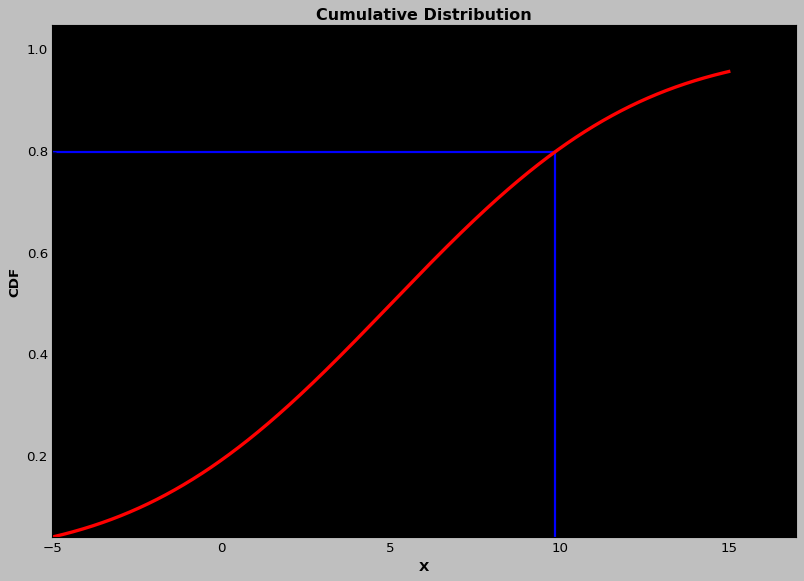

In [100]:
percent = 0.8
X = np.linspace(-5, 15, 10000)
x = compute_inverse_cdf(percent, np.mean(X), np.std(X))
cdf = norm.cdf(X, np.mean(X), np.std(X))
plot_cdf(X, cdf)